# Step 1: Import necessary libraries


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Step 2: Load the California Housing Prices dataset


In [2]:
california_housing=fetch_california_housing()

In [3]:
california_housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
# creat dataframe from dataset

data=pd.DataFrame(data=np.c_[california_housing['data'],california_housing['target']],
                            columns=california_housing['feature_names'] + ['target'])

In [5]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [15]:
# extract the features (x) and target (y)

X=data.drop('target', axis=1)
y=data['target'] 

In [16]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [17]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

# Step 3: Data Splitting


In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=65)


In [27]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
19553,1.0801,28.0,3.229692,1.176471,1043.0,2.921569,37.62,-121.00
8326,2.5679,36.0,4.191388,1.031100,2521.0,3.015550,33.94,-118.30
15440,5.0400,22.0,7.160944,1.111588,1288.0,2.763948,33.20,-117.21
1183,3.2833,33.0,6.329004,1.043290,569.0,2.463203,39.50,-121.52
9483,3.9632,20.0,5.742857,0.864286,448.0,3.200000,39.33,-123.23
...,...,...,...,...,...,...,...,...
7900,5.9300,16.0,5.958656,1.015504,1368.0,3.534884,33.87,-118.03
1916,3.9300,11.0,6.474265,1.145221,1456.0,2.676471,38.81,-121.04
3660,3.6591,36.0,5.207739,1.099796,1556.0,3.169043,34.22,-118.40
1810,2.2301,26.0,5.252703,1.052703,2512.0,3.394595,37.92,-122.33


In [28]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
10421,4.0313,31.0,5.108387,1.104516,1919.0,2.476129,33.42,-117.61
10946,3.0083,25.0,3.343866,1.035316,3416.0,6.349442,33.74,-117.88
9443,3.8333,24.0,5.733333,1.400000,79.0,2.633333,37.67,-119.81
18928,6.3735,8.0,5.339130,1.026087,278.0,2.417391,38.09,-122.19
7766,4.0878,22.0,4.334792,1.032823,1231.0,2.693654,33.91,-118.11
...,...,...,...,...,...,...,...,...
2773,1.8958,12.0,5.823529,1.470588,37.0,2.176471,33.28,-115.95
296,1.9356,41.0,4.490141,1.033803,1074.0,3.025352,37.76,-122.17
575,3.1972,20.0,3.546012,1.119632,583.0,1.788344,37.75,-122.28
10357,7.5791,18.0,6.783905,1.052161,1918.0,2.858420,33.59,-117.66


In [29]:
y_test

19553    0.750
8326     1.149
15440    2.537
1183     0.826
9483     1.471
         ...  
7900     2.776
1916     1.634
3660     1.838
1810     1.224
3529     3.084
Name: target, Length: 4128, dtype: float64

In [30]:
y_train

10421    2.820
10946    1.635
9443     0.938
18928    1.663
7766     1.537
         ...  
2773     0.538
296      0.906
575      1.000
10357    2.881
7982     1.729
Name: target, Length: 16512, dtype: float64

# Step 4: Linear Regression Modeling


In [19]:
# creat Liner Regression model

model=LinearRegression()

In [20]:
# train the model on training data

model.fit(X_train,y_train)

LinearRegression()

# Step 5: Model Evaluation


In [21]:
# Make prediction on testing data

y_pred= model.predict(X_test)

In [26]:
y_pred

array([0.91759494, 1.81776824, 2.33693265, ..., 2.15394264, 1.55896137,
       3.80814857])

In [22]:
# calculate mean absolute error (MAE)

mae=mean_absolute_error(y_test,y_pred)

In [23]:
# calculate mean squared error (MSE)

mse=mean_squared_error(y_test,y_pred)

In [24]:
# calculate R-(squared) r2 score 

r2 = r2_score(y_test,y_pred)

# Step 6: Results


In [25]:
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R²) Score: {r2:.2f}')

Mean Absolute Error (MAE): 0.53
Mean Squared Error (MSE): 0.52
R-squared (R²) Score: 0.61


# Step 7: Visualization


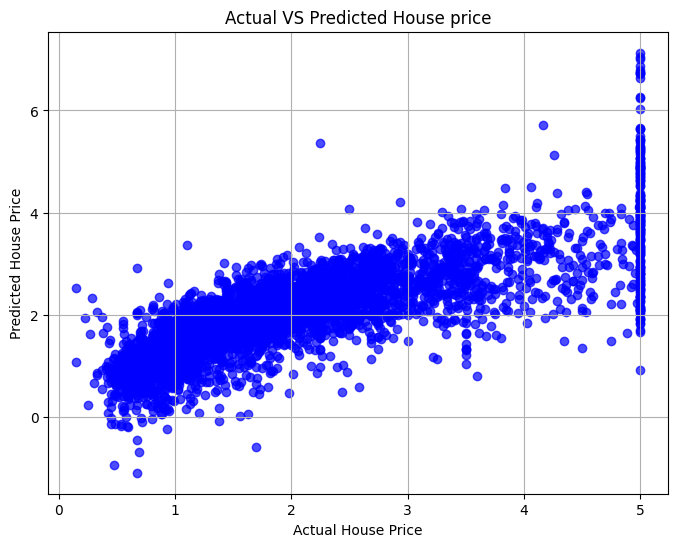

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,color='blue',alpha=0.7)
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.title('Actual VS Predicted House price')
plt.grid(True)
plt.show()